In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [ ]:
# Load datasets
c2h2_raw = np.load('/content/C2H2dataPostComb.npy')
c2h2_normalized = np.abs(c2h2_raw)
c2h2_titles = np.zeros(100)
c2h2_titles = c2h2_titles.reshape(1, 100)
c2h2_normalized = np.concatenate((c2h2_normalized, c2h2_titles.T), axis = 1)

ch4_raw = np.load('/content/CH4dataPostComb.npy')
ch4_normalized = np.abs(ch4_raw)
ch4_titles = np.ones(100)
ch4_titles = ch4_titles.reshape(1, 100)
ch4_normalized = np.concatenate((ch4_normalized, ch4_titles.T), axis = 1)

In [ ]:
# Adjustable parameters
training_data_amt = 70

# Partition data sets

channel_names = []
for i0 in range(40000):
  name = f'channel_{i0}'
  channel_names.append(name)
channel_names.append('molecule_name')

training_data = pd.DataFrame(columns = channel_names)
validation_set = pd.DataFrame(columns = channel_names)

i1 = 0
while (i1 < training_data_amt):
  training_data.loc[(2 * i1)] = c2h2_normalized[i1]
  training_data.loc[(2 * i1) + 1] = ch4_normalized[i1]
  i1 = i1 + 1

while (i1 < 100):
  validation_set.loc[((2 * i1)) - (2 * training_data_amt)] = c2h2_normalized[i1]
  validation_set.loc[((2 * i1) + 1) - (2 * training_data_amt)] = ch4_normalized[i1]
  i1 = i1 + 1

X_train = training_data.drop('molecule_name', axis = 1)
y_train = training_data['molecule_name']

X_test = validation_set.drop('molecule_name', axis = 1)
y_test = validation_set['molecule_name']

In [ ]:
X_train

,channel_0,channel_1,channel_2,channel_3,channel_4,channel_5,channel_6,channel_7,channel_8,channel_9,...,channel_39990,channel_39991,channel_39992,channel_39993,channel_39994,channel_39995,channel_39996,channel_39997,channel_39998,channel_39999
0,40.212079,94.557628,91.187981,23.503124,75.909001,2.331669,76.865692,9.793685,73.474666,13.112591,...,71.876911,9.728288,77.527457,2.387908,78.934579,24.815298,88.648492,101.633508,43.335147,79.314594
1,90.613842,73.743912,82.187425,77.163010,167.030048,59.258863,50.730909,121.917231,50.360845,87.130710,...,53.120806,128.016038,53.029594,61.668554,173.056539,79.598229,81.905451,74.391317,89.771470,218.947580
2,101.441317,29.056545,41.874143,69.938783,143.112179,70.479333,121.761588,89.128171,92.934233,50.111477,...,91.581950,87.445045,118.929956,68.529518,138.516355,67.378943,44.577691,28.276339,100.178791,163.643101
3,53.790609,69.868018,101.569732,91.097996,74.729203,29.206088,163.277147,125.029254,50.947112,58.069695,...,56.764805,139.119376,181.432111,32.409418,82.812058,100.812340,117.436898,77.041814,59.182461,152.842660
4,64.788353,61.912922,70.936414,46.326199,109.581288,51.851267,117.831213,94.282161,89.275592,159.371202,...,81.673864,86.470891,108.343264,47.798404,101.277820,42.927954,68.980575,58.007055,61.214238,94.710289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,108.920589,49.234848,92.047133,47.693071,65.268940,37.614529,170.092709,24.913635,85.863547,107.036105,...,97.422105,28.415049,195.001685,43.343973,75.592631,55.514662,98.560244,57.113587,125.289983,93.787054
136,48.369598,55.023032,95.334122,35.407332,51.722479,26.005664,29.775589,79.828461,163.480461,75.822622,...,152.612759,75.706550,28.688124,25.456114,51.440253,35.779537,90.190014,56.406233,49.504505,69.898921
137,136.999040,140.888339,56.691344,25.731909,40.829836,28.702454,92.139085,122.522166,137.438945,102.312133,...,130.316464,116.057951,87.190518,27.133373,38.558127,24.274922,58.082676,134.210836,131.923804,57.554898
138,102.120671,43.336973,67.859919,86.793768,22.501008,101.913266,126.813058,58.162834,135.565586,49.633264,...,137.760504,58.522222,126.337743,100.528093,21.975550,83.926787,69.508818,41.542020,98.013786,138.715964


In [ ]:
# Create random forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


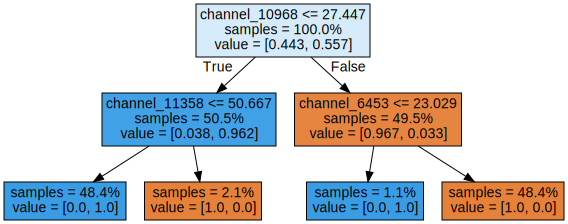

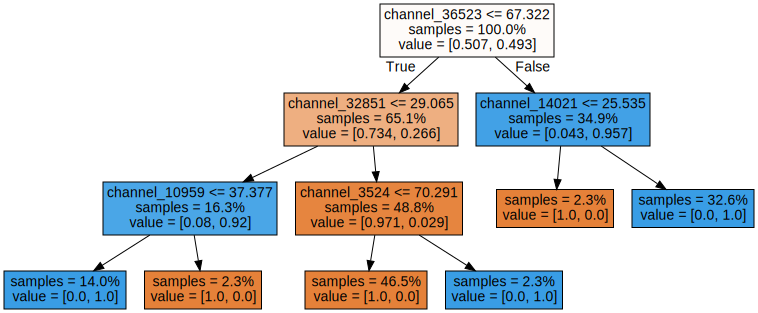

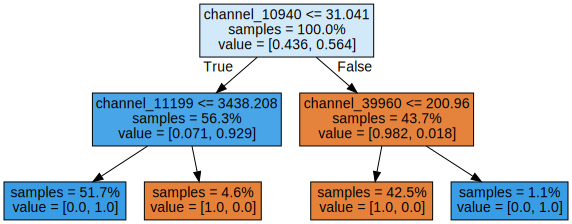

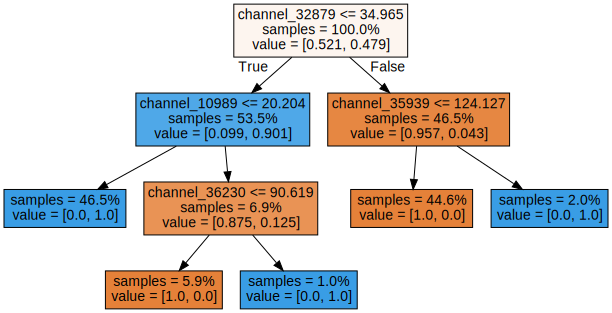

In [ ]:
# Export the first three decision trees from the forest

for i in range(4):
  tree = rf.estimators_[i]
  dot_data = export_graphviz(tree,
                             feature_names = X_train.columns,
                              filled = True,
                              max_depth = 3,
                              impurity = False,
                              proportion = True)
  graph = graphviz.Source(dot_data)
  display(graph)

In [ ]:
# Perform pipeline
accuracies = []
threshold = 1
while (threshold <= 10):
  channel_names = []
  for i0 in range(40000):
    name = f'channel_{i0}'
    channel_names.append(name)
  channel_names.append('molecule_name')

  training_data = pd.DataFrame(columns = channel_names)
  validation_set = pd.DataFrame(columns = channel_names)

  i1 = 0
  while (i1 < threshold):
    training_data.loc[(2 * i1)] = c2h2_normalized[i1]
    training_data.loc[(2 * i1) + 1] = ch4_normalized[i1]
    i1 = i1 + 1

  while (i1 < 100):
    validation_set.loc[((2 * i1)) - (2 * threshold)] = c2h2_normalized[i1]
    validation_set.loc[((2 * i1) + 1) - (2 * threshold)] = ch4_normalized[i1]
    i1 = i1 + 1

  X_train = training_data.drop('molecule_name', axis = 1)
  y_train = training_data['molecule_name']

  X_test = validation_set.drop('molecule_name', axis = 1)
  y_test = validation_set['molecule_name']

  rf = RandomForestClassifier()
  rf.fit(X_train, y_train)
  y_pred = rf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  accuracies.append(accuracy)
  threshold = threshold + 1

[0.5303030303030303, 0.5714285714285714, 0.6237113402061856, 0.8958333333333334, 0.9263157894736842, 0.9680851063829787, 1.0, 1.0, 1.0, 1.0]


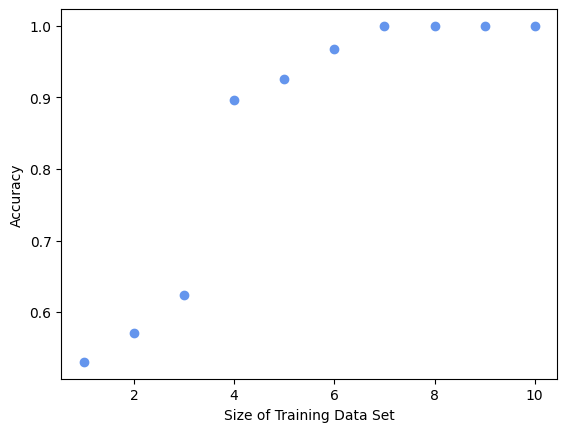

In [ ]:
figure = plt.figure()
axes = figure.add_subplot(1, 1, 1)

axes.scatter(np.linspace(1, 10, 10), accuracies, color = 'cornflowerblue')
axes.set_xlabel('Size of Training Data Set')
axes.set_ylabel('Accuracy')
print(accuracies)